# Linear Regression

### Dataset
The  dataset used for this demostration contains data about people and their insurance premium. Based on a number of factors, their insurance is deicided.

In [10]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data_df = pd.read_csv('../Datasets/Insurance.csv')
pd.set_option('display.max_columns', None)

In [3]:
data_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null values.

In [7]:
y = data_df['charges']
X = data_df.drop(['charges'], axis=1)

In [8]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X,y, random_state=0)

In [9]:
print('Shape of training data and prediction: {}'.format(train_X.shape))
print('Shape of testing data and prediction: {}'.format(test_X.shape))

Shape of training data and prediction: (1003, 6)
Shape of testing data and prediction: (335, 6)


### Basic EDA

Merging train_X, train_y to perform EDA

In [11]:
train =  pd.concat([train_X,train_y], axis=1)

In [12]:
train.shape

(1003, 7)

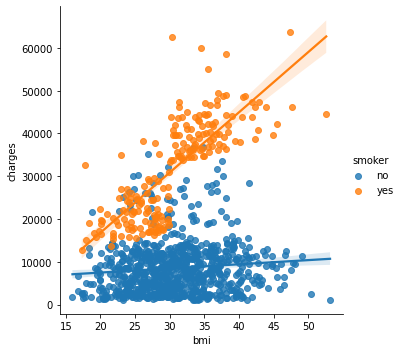

In [21]:
sns.lmplot(data=train, x='bmi', y='charges', hue='smoker')

<AxesSubplot:xlabel='age', ylabel='charges'>

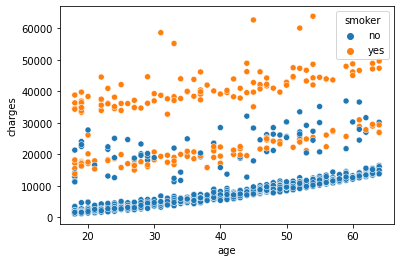

In [17]:
sns.scatterplot(data=train, x='age', y='charges', hue='smoker')

In [18]:
train[train.charges.values > 50000]

,age,sex,bmi,children,smoker,region,charges
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1300,45,male,30.360,0,yes,southeast,62592.87309
543,54,female,47.410,0,yes,southeast,63770.42801


<AxesSubplot:xlabel='smoker', ylabel='charges'>

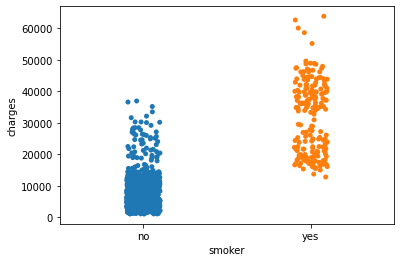

In [20]:
sns.stripplot(data=train, x='smoker', y='charges')